# Images In Frequency Domain Demo

## Fourier Transform 

### $$ I(u,v) = \sum_{x= 0}^{N_{clos} - 1 } \sum_{y = 0}^{N_{rows} - 1}  I(x,y) e^{-i2 \pi (\frac{xu}{N_{cols}}+\frac{yv}{N_{rows}})}$$

### Import neccesary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.image as mpimg
from scipy import fftpack

### Extraction of Value Channel From RGB Image

In [2]:
def extractValueChannel(image):
    try:
        # Check if it has three channels or not 
        np.size(image, 2)
    except:
        return image
    hsvImage = col.rgb_to_hsv(image)
    return hsvImage[..., 2]


### Generate a frequency domain filter 
* Only ideal low pass filter and high pass filters are supported
* w is the width of the filter window (fraction of image width)
* h is the height of filter widnow (fraction of image height)
* filterType is LPF or HPF only

In [3]:
def generateFilter(image,w,h, filtType):
    if w > 0.5 or h > 0.5:
        print("w and h must be < 0.5")
        exit()
    m = np.size(image,0)
    n = np.size(image,1)
    LPF = np.zeros((m,n))
    HPF = np.ones((m,n))
    xi = np.round((0.5 - w/2) * m)
    xf = np.round((0.5 + w/2) * m)
    yi = np.round((0.5 - h/2) * n)
    yf = np.round((0.5 + h/2) * n)
    LPF[int(xi):int(xf),int(yi):int(yf)] = 1
    HPF[int(xi):int(xf),int(yi):int(yf)] = 0
    if filtType == "LPF":
        return LPF
    elif filtType == "HPF":
        return HPF
    else:
        print("Only Ideal LPF and HPF are supported")
        exit()

### Loading the images

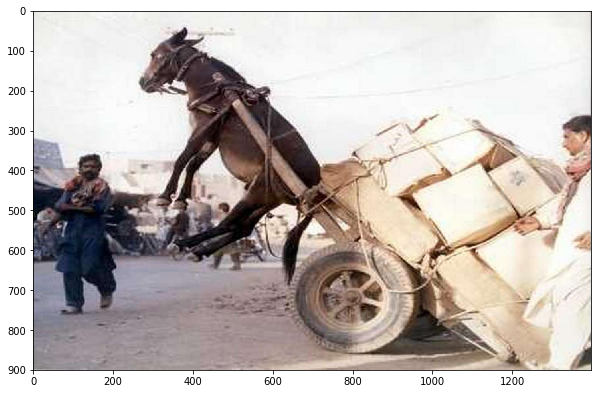

In [4]:
image = mpimg.imread("images/Donkey.bmp")
plt.figure("Original Image", figsize=(10,10))
plt.imshow(image)

### Extract Value Channel

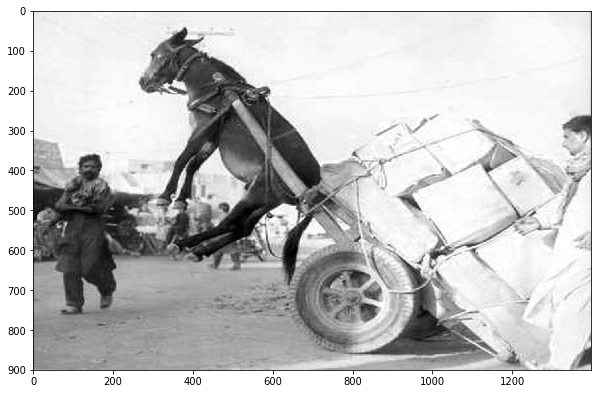

In [13]:
valueChannel = extractValueChannel(image)
plt.figure("Value Channel of the Image", figsize=(10,10))
plt.imshow(valueChannel)

### Getting Fourier Transform of the image


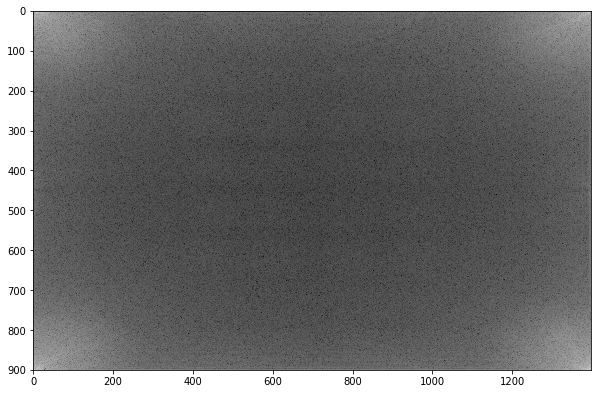

In [6]:
valueChannel = extractValueChannel(image)
FT = fftpack.fft2(valueChannel)
plt.figure("Fourier Transform of the Image", figsize=(10,10))
plt.imshow(np.log(1+np.abs(FT)))
plt.set_cmap("gray")

### Apply shift of the spectrum

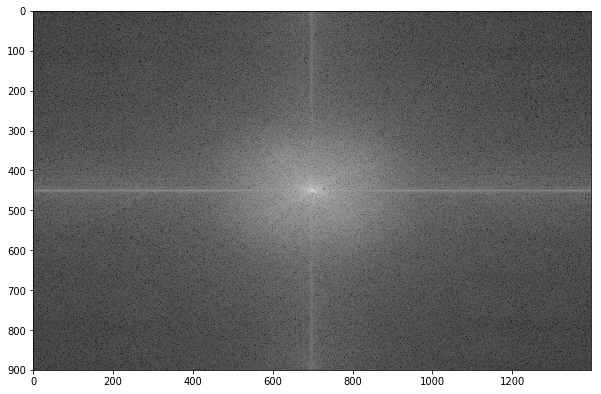

In [7]:
ShiftedFT = fftpack.fftshift(FT)
plt.figure("Fourier Transform of the Image", figsize=(10,10))
plt.imshow(np.log(1+np.abs(ShiftedFT)))
plt.set_cmap("gray")

### Effect of log  excluding  
Magnitude visualization of fourier transform without log operator

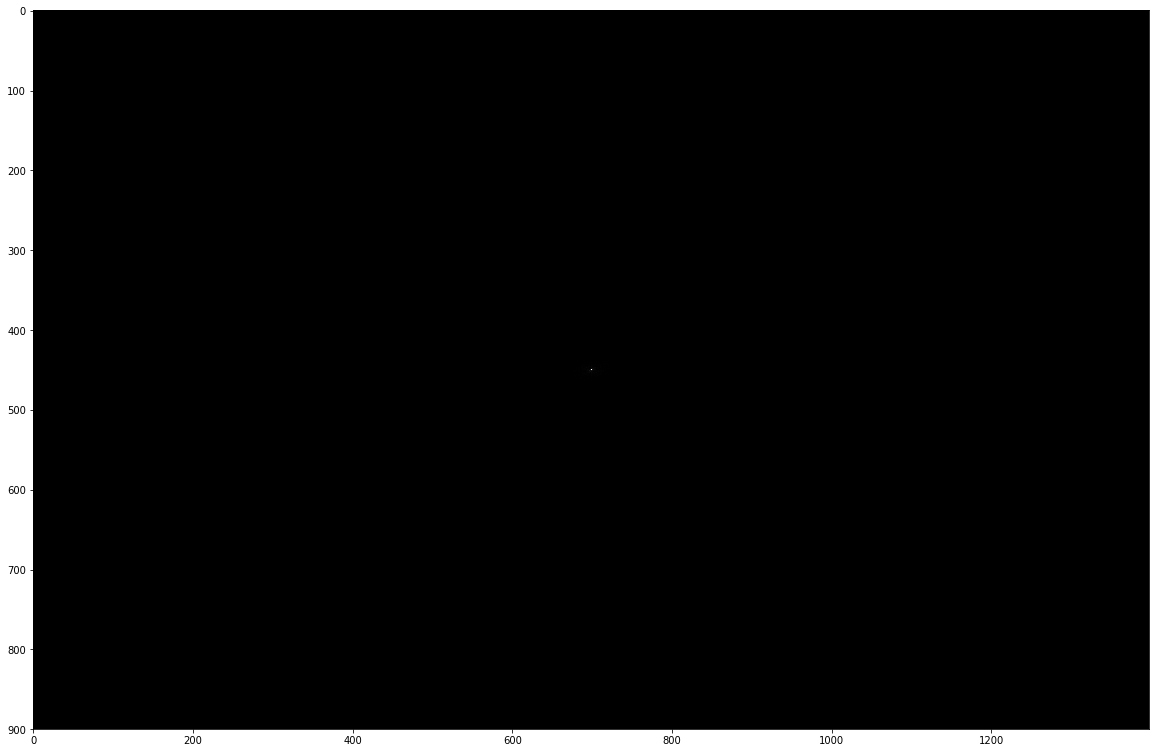

In [8]:
ShiftedFT = fftpack.fftshift(FT)
plt.figure("Fourier Transform of the Image", figsize=(20,20))
plt.imshow(np.abs(ShiftedFT))
plt.set_cmap("gray")

### Generate Ideal LPF filter in frequency Domain 

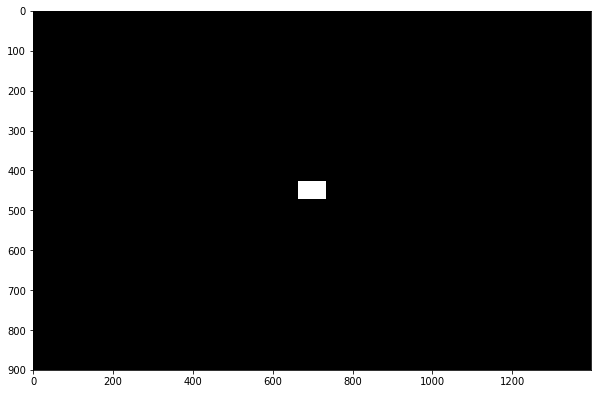

In [9]:
LPF = generateFilter(ShiftedFT,0.05, 0.05, "LPF")
plt.figure("Ideal Low Pass Filter in frequency domain", figsize=(10,10))
plt.imshow(LPF)

### Apply Filter in Frequency Domain 
#### Just multipy the ideal LPF by the fourier spectrum of the image

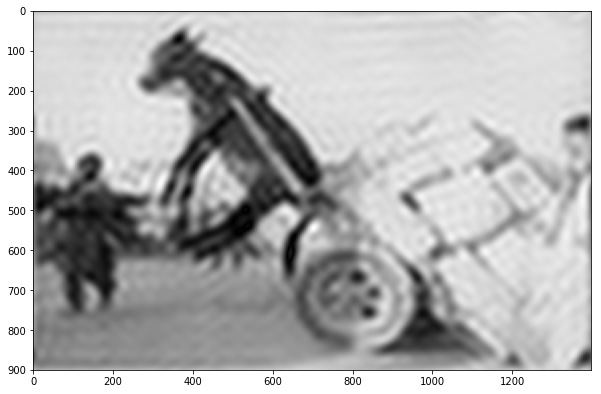

In [10]:
filteredVChannel = np.abs(fftpack.ifft2(LPF * ShiftedFT))
plt.figure("Filtered Value Channel of the Image", figsize=(10,10))
plt.imshow(filteredVChannel)

### Recover color information

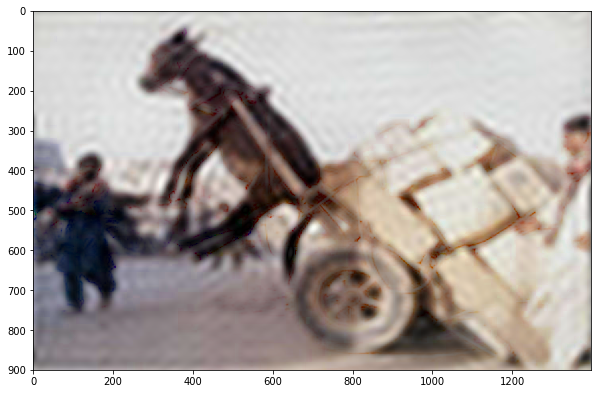

In [11]:
# Covert Image to hsv
hsvImage = col.rgb_to_hsv(image)
filteredVChannel = filteredVChannel/np.max(filteredVChannel)
# Add filtered value channel to hsv image
hsvImage[...,2] = filteredVChannel
# Return Back to rgb color space
finalImage = col.hsv_to_rgb(hsvImage)
plt.figure("Final Image", figsize=(10,10))
plt.imshow(finalImage)

## Same for HPF 

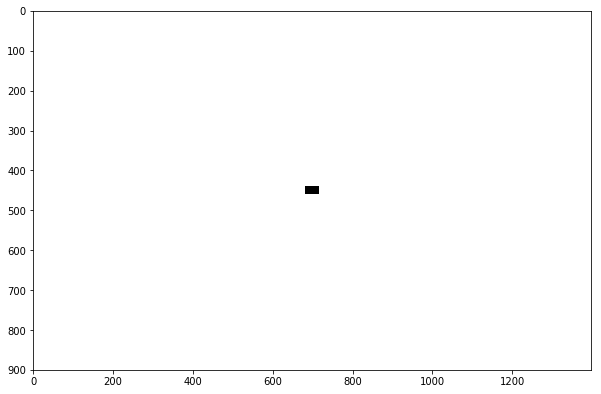

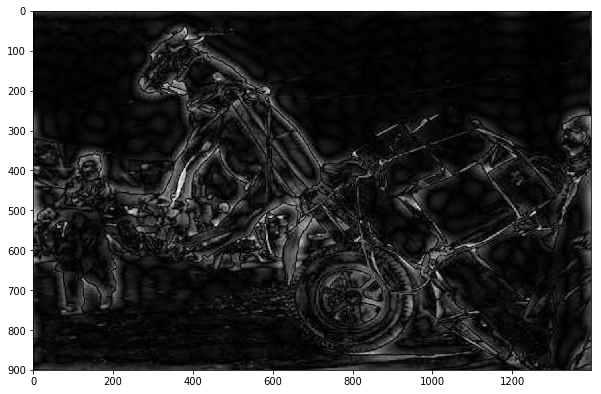

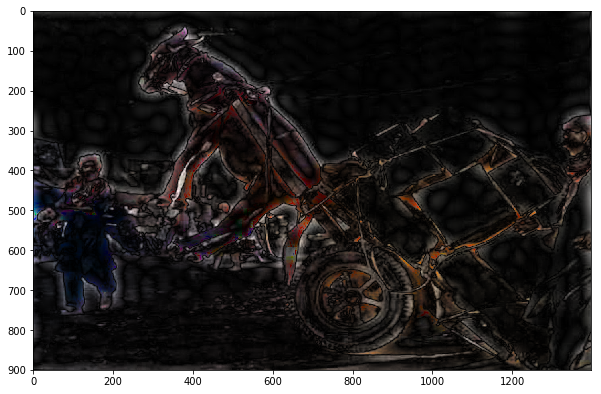

In [12]:
HPF = generateFilter(ShiftedFT,0.025, 0.025, "HPF")
plt.figure("Ideal High Pass Filter in frequency domain", figsize=(10,10))
plt.imshow(HPF)
filteredVChannel = np.abs(fftpack.ifft2(HPF * ShiftedFT))
plt.figure("Filtered Value Channel of the Image", figsize=(10,10))
plt.imshow(filteredVChannel)
# Covert Image to hsv
hsvImage = col.rgb_to_hsv(image)
filteredVChannel = filteredVChannel/np.max(filteredVChannel)
# Add filtered value channel to hsv image
hsvImage[...,2] = filteredVChannel
# Return Back to rgb color space
finalImage = col.hsv_to_rgb(hsvImage)
plt.figure("Final Image", figsize=(10,10))
plt.imshow(finalImage)